<a href="https://colab.research.google.com/github/incredet/dyvan/blob/main/args.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Інтерфейс командного рядка

Інтерфейс командного рядка дозволяє користувачеві за допомогою команд в текстовому режимі взаємодіяти з операційною системою та іншими програмами.
Інтерфейс командного рядка доступний користувачу після запуску програми `bash`, `cmd` та подібних.
Взаємодія грунтується на використанні наступних елементів:
* команд або програм
* аргументів командного рядка (можуть бути відсутні)
* представлення результатів виконання
* системи допомоги (доступ до документації)

В різних програмах що надають інтерфейс командного рядка, цей перелік може відрізнятися.


В наступному прикладі використовуєтся назва програми - інтерпретатор Python та параметр (option) `-с`, який вказує інтерпретатору виконати вказаний після параметру аргумент (argument) як Python програму

In [ ]:
!python -c "print('APPS UCU')"

APPS UCU


Наступний приклад демострує використання окремого параметру `-h`, що дозволить ознайомитися з повним переліком параметрів. 

In [ ]:
!python -h

usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Options and arguments (and corresponding environment variables):
-b     : issue warnings about str(bytes_instance), str(bytearray_instance)
         and comparing bytes/bytearray with str. (-bb: issue errors)
-B     : don't write .pyc files on import; also PYTHONDONTWRITEBYTECODE=x
-c cmd : program passed in as string (terminates option list)
-d     : debug output from parser; also PYTHONDEBUG=x
-E     : ignore PYTHON* environment variables (such as PYTHONPATH)
-h     : print this help message and exit (also --help)
-i     : inspect interactively after running script; forces a prompt even
         if stdin does not appear to be a terminal; also PYTHONINSPECT=x
-I     : isolate Python from the user's environment (implies -E and -s)
-m mod : run library module as a script (terminates option list)
-O     : remove assert and __debug__-dependent statements; add .opt-1 before
         .pyc extension; also PYTHONOPTIMIZE=x
-OO

# Список sys.argv

Для наступних пояснень підготовано програму `main.py`. Текст програми наступний й його потрібно зберегти у файлі `main.py` в оремій теці.

In [ ]:
# main.py

import sys

if __name__ == "__main__":
    print(f"Arguments count: {len(sys.argv)}")
    for i, arg in enumerate(sys.argv):
        print(f"Argument {i:>6}: {arg}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Для виконання цієї програми потрібно перемістися у відповідну теку та виконати запуск з командного рядка.

In [ ]:
%cd temp
!python main.py

/content/temp
Arguments count: 1
Argument      0: main.py


Якщо додати після імені програми декілька рядків то можна побачити, що програма змінила свою поведінку й виведено не тільки ім'я програми але й всі рядки, які були вказані при запуску.  

In [ ]:
!python main.py APPP UCU 2021

Arguments count: 4
Argument      0: main.py
Argument      1: APPP
Argument      2: UCU
Argument      3: 2021


Якщо переглянути код в `main.py`, то потрібно звернути увагу на форматований вивід та на використання атрибуту `sys.argv` модуля `sys`.  

Атрибут sys.argv забезпечує базову пітримку для роботи з аргументами командного рядка в Python. За допомогою цього атрибуту можна:
* отримати доступ до атрибутів (вмісту sys.argv)
* використовувати sys.argv як глобальну змінну
Також при роботі з атрибутами потрібно вміти:
* обробляти пробіли в аргументах командного рядка Python
* обробляти помилки під час доступу до аргументів командного рядка Python


##Доступ до аргументів

Список(масив) `argv` модуля `sys` містить:
- `argv[0]` ім'я Python програми, що виконується
- `argv[1:]` всі інші аргументи, що передаються програмі

Наступна програма `argv.py` це демонструє 

In [ ]:
# argv.py

import sys


print(f"Name of the script      : {sys.argv[0]=}")

print(f"Arguments of the script : {sys.argv[1:]=}")

In [ ]:
!pwd

/content


In [ ]:
%cd temp
!python argv.py APPS UCU 2021

[Errno 2] No such file or directory: 'temp'
/content/temp
Name of the script      : argv.py
Arguments of the script : ['APPS', 'UCU', '2021']


Отже, `sys.argv` містить усі аргументи командного рядка `argv.py`. При виконанні python програми  інтерпретатор аналізує командний рядок й зберігає всі аргументи у `sys.argv`.

##Робота з аргументами

Оскільки `sys.argv` це список

In [ ]:
type(sys.argv)

list

то в програмі можна працювати з аргументами як зі звичайним списком.
Наступна програма `reverse.py`це демонструє 

In [ ]:
import sys

args = sys.argv
name = args[1]
print([arg[::-1] for arg in args[1].split()])

['f-']


In [ ]:
!python reverse.py APPS UCU 2021

['SPPA', 'UCU', '1202']


`sys.argv` це глобальна змінні й потрібно це враховувати при її використанні.
В будь-якому місці програми можна її змінювати

In [ ]:
# argv_pop.py

import sys

print(sys.argv)
sys.argv.pop()
print(sys.argv)


In [ ]:
!python argv_pop.py APPS UCU 2021

Для уникнення невизначеності при роботі програми, якщо аргументи випадково зазнали змін вартує за потреби їх зберігати  

In [ ]:
# argv_var_pop.py

import sys

print(sys.argv)
args = sys.argv[1]
print(args)
sys.argv.pop()
print(sys.argv)
print(args)


In [ ]:
!python argv_var_pop.py APPS UCU 2021

In [ ]:
# fragment from pip source code
def main(args=None):
    if args is None:
        args = sys.argv[1:]


##Обробка помилок

Аргументи командного рядка Python — це окремі рядки. Для того щоб користувач передавав в програму правильні аргументи потрібно надати йому додаткову інформацію (вказівки) Наприклад, reverse.py очікує один аргумент, і якщо при запуску його опустити то буде отримано виняток:

In [ ]:
!python reverse.py

Traceback (most recent call last):
  File "reverse.py", line 4, in <module>
    name = args[1]
IndexError: list index out of range


Найпростіший спосіб цьому запобігти це перехопити та обробити цю виняткову ситуацію

In [ ]:
# reverse_exc.py

import sys

try:
    args = sys.argv
    name = args[1]
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <string_to_reverse>")

print([arg[::-1] for arg in args[1].split()])

In [ ]:
!python reverse_exc.py

# Аргументи командного рядка

Аргументи командного рядка Python можуть складатися з різних типів аргументів:
* Параметри(options) змінюють поведінку команди або програми.
* Аргументи представляють дані призначені для обробки (звідки отримати дані та де зберегти після обробки).
* Підкоманди(subcommands) дозволяють використовувати більше одну команду з відповідним набором параметрів та аргументів.


##Стандарти

Відомі наступні стандарти, які забезпечують узгодженіть при створенні команд та визначенні їх аргументів. Стандарти надають вказівки, як це правильно зробити.
Наступні фрагменти з цих стандартів демострують відмінності, які в них присутні.


* POSIX:
** A program or utility is followed by options, option-arguments, and operands.
** All options should be preceded with a hyphen or minus (-) delimiter character.
** Option-arguments should not be optional.
* GNU:
** All programs should support two standard options, which are --version and --help.
** Long-named options are equivalent to the single-letter Unix-style options. An example is --debug and -d.
* docopt:
** Short options can be stacked, meaning that -abc is equivalent to -a -b -c.
** Long options can have arguments specified after a space or the equals sign (=). The long option --input=ARG is equivalent to --input ARG.


##Параметри

Параметри (options), також називають прапорцями(flag), ключами чи перемикачами (switch) змінюють поведінку програми. Наприклад команда `ls` в Linux dвиводить на екран вміст поточної директорії (файли та директорії)

In [ ]:
!ls

argv.py  main.py


Якщо до цієї команди додати два параметри `-l` та `-s` то результат її виконання змінюється

In [ ]:
!ls -ls

total 8
4 -rw-r--r-- 1 root root 114 Oct 27 08:41 argv.py
4 -rw-r--r-- 1 root root 165 Oct 27 08:30 main.py


Параметри також можуть мати аргументи. Наступний приклад демонструє використання параметрів та їх аргументів.

In [ ]:
!od -t x1z -N 32 main.py

0000000 69 6d 70 6f 72 74 20 73 79 73 0a 0a 69 66 20 5f  >import sys..if _<
0000020 5f 6e 61 6d 65 5f 5f 20 3d 3d 20 22 5f 5f 6d 61  >_name__ == "__ma<
0000040


Наведена вище команда виводить 32 перших байти з файла в шістнадцятковому форматі.
-t тип виведення, x-шістнацятковий формат, 1-один байт на ціл число, z-показати друковані символи
-N кількість байт

##Аргументи

Аргументи або операнди представляють дані які використовує команда. Наприклад команда `cp`, використовується для копіювання файлів у файли чи деректорії потребує щонайменше два операнди - файл що копіюється та файл у який копіюється.

In [ ]:
!ls

argv.py  main.py  reverse.py  sample_data  temp


In [ ]:
!cp argv.py argvv.py

In [ ]:
!ls

argv.py  argvv.py  main.py  reverse.py	sample_data  temp


##Підкоманди (Subcommands)

Стандартні утиліти Unix це невеликі програми, які призначені для виконання однієї дії.
Сучасна генрація програм `git`,`go`,`doker` та інші використовують підкоманди.
Наприклад в `git`:
* git branch displays the branches of the local git repository.
* git branch custom_python creates a local branch custom_python in a local repository.
* git branch -d custom_python deletes the local branch custom_python.
* git branch --help displays the help for the git branch subcommand.

В pip також використовуються підкоманди - list, install, freeze, та uninstall.

##Аргументи командного рядка Python

Командний рядок Python (рядок, що запускає програму на виконання) складається з двох частин:
* Параметри інтерпретатора Python
* Python програма та її аргументи  

Наступна команда містить параметри інтерпретатора -B, -v та параметри й аргументи, що передаються у програму --verbose, --debug, APPS, UCU.  

In [ ]:
!python -B -v main.py --verbose --debug APPS UCU

In [ ]:
!python

Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> fhfh
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'fhfh' is not defined
>>> 
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C
^C


In [ ]:
c

параметр -B вказує інтерпретатору не створювати файли *.pyc при імпортуванні модулів

параметр -v (verbose) вказує інтерпретатору відслідковувати всі інструкції import

Наступний рисунок ілюструє та пояснює цю команду
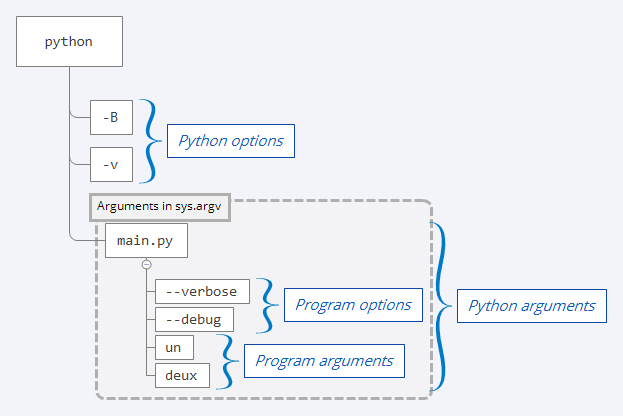
https://realpython.com/python-command-line-arguments/#the-anatomy-of-python-command-line-arguments

# Розбір аргументів командного рядка

Якщо комндний рядок Python містить параметри, аргументи та інші операнди то для роботи з ними потрібно використовувати спеціальні підходи.
В найпростішому випадку достатньо працювати з аргументами як з елементами списку. Більш складні випадки вимагають використанні регулярних виразів.

##Робота з рядками

Розглянемо наступну програму, яка призначена для модифікації регістру аргументів командного рядка.

In [ ]:

# cul.py

import sys

opts = [opt for opt in sys.argv[1:] if opt.startswith("-")]
args = [arg for arg in sys.argv[1:] if not arg.startswith("-")]

if "-c" in opts:
    print(" ".join(arg.capitalize() for arg in args))
elif "-u" in opts:
    print(" ".join(arg.upper() for arg in args))
elif "-l" in opts:
    print(" ".join(arg.lower() for arg in args))
else:
    raise SystemExit(f"Usage: {sys.argv[0]} (-c | -u | -l) <arguments>...")


In [ ]:
print(12)

12


In [ ]:
!python cup.py -u adfvds fbfgbb

ADFVDS FBFGBB


В програмі передбачено використання наступних параметрів:
* -c для пертворення перших літер аргументів у великі літери
* -u для перетворення аргументів до верхнього регістру
* -l для перетворення аргументів до нижнього регістру

In [ ]:
!python cul.py -c APPS UCU

Apps Ucu


In [ ]:
!python cul.py -u APPS UCU

APPS UCU


In [ ]:
!python cul.py -l APPS UCU

apps ucu


# Засоби стандартної бібліотеки для обробки аргументів командного рядка

Для роботи з аргументами командного рядка використовуються різні підходи (робота зі списком, регулярні вирази, окремі програми розбору). У випадках коли у програмі потрібно реалізувати складний інтерфейс командного рядка потрібно використовувати бібліотеки зі стандартної бібліотеки.
У Python3.8 є дві біліотеки, що дозволяють розбирати та обробляти командні рядки:
* argparse
* getopt

Зараз у більшості випадків рекомендують використовувати `argparse`



##модуль argparse

###Початок роботи

Для початку роботи з модулем argparse достатньо виконати три кроки.

In [ ]:
# argparse_1.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')

args = parser.parse_args()

В рядку 3 імпортується модуль

В рядку 5 створення парсера (об\'єкт, який буде розбирати командний рядок)

В рядку 7 виконується розбір аргументів командного рядка

Об\'єкт parser дозволяє додавати параметри та аргументи командного рядка. Функція `parse_args()` видобуває аргументи з командного рядка, які вводить користувач. 

In [ ]:
%cd ..
%cd argparsetut
!ls


/content
/content/argparsetut
argparse_1.py


In [ ]:
!python argparse_1.py --a=1234

1234


Якщо додати параметр командного рядка з ім\'ям `a`, то можна буде його використовувати при запуску програми

In [ ]:
# argparse_2.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')
parser.add_argument("--a")

args = parser.parse_args()
a = args.a
print(a)

Для додавання аргументу командного рядка використовується функція `add_argument`, а для доступу до значення, яке отримано з `a` використовується `args.a`

In [ ]:
!python argparse_2.py --a="APPS UCU"

APPS UCU


Більш зручним буде наступний варіант програми де атрибуту присвоєно значення по замовчуванню та додано рядок з описом параметра, який буде зображатися при використанні `--help`

In [ ]:
# argparse_3.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')
parser.add_argument("--a", default="2021", help="This is the 'a' variable")

args = parser.parse_args()
a = args.a
print(a)

In [ ]:
!python argparse_3.py

2021


In [ ]:
!python argparse_3.py --help

usage: argparse_3.py [-h] [--a A]

A tutorial of argparse!

optional arguments:
  -h, --help  show this help message and exit
  --a A       This is the 'a' variable


###Просте використання аргументів командного рядка

Для додаткової специфікації аргументів можна вказати тип кожного з них. В такому випадку при обробці аргументів буде відбуватися за потреби й перетворення типів 

In [ ]:
# argparser_4.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')
parser.add_argument("--a", default=2021, type=int, help="This is the 'a' variable")
parser.add_argument("--name", default=None, type=str, help="Your name")

args = parser.parse_args()
print(args.name, args.a)

In [ ]:
!python argparse_4.py

None 2021


In [ ]:
!python argparse_4.py --name "APPS UCU"

APPS UCU 2021


Для того щоб вказати користувачу на необхідність передачі значення для певного аргументу потрібно використовувати ключове слово `required`. Значення True для `required` зобов\'язує користувача встановити значення для параметра --name. 

In [ ]:
# argparser_5.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')
parser.add_argument("--a", default=2021, type=int, help="This is the 'a' variable")
parser.add_argument("--name", required=True, type=str, help="Your name")

args = parser.parse_args()
print(args.name, args.a)

In [ ]:
!python argparse_5.py --name "APPS UCU"

APPS UCU 2021


In [ ]:
!python argparse_5.py

usage: argparse_5.py [-h] [--a A] --name NAME
argparse_5.py: error: the following arguments are required: --name


Також можна обмежити варіанти значень для певного аргументу за допомогою `choices`

In [ ]:
# argparse_6.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')
parser.add_argument("--a", default=1, type=int, help="This is the 'a' variable")
parser.add_argument("--education", 
                    choices=["highschool", "college", "university", "other"],
                    required=True, type=str, help="Your name")

args = parser.parse_args()

ed = args.education

if ed == "college" or ed == "university":
    print("Has degree")
elif ed == "highschool":
  print("Finished Highschool")
else:
    print("Does not have degree")

In [ ]:
!python argparse_6.py --education "university"

Has degree


In [ ]:
!python argparse_6.py --education "VUZ"

usage: argparse_6.py [-h] [--a A] --education
                     {highschool,college,university,other}
argparse_6.py: error: argument --education: invalid choice: 'VUZ' (choose from 'highschool', 'college', 'university', 'other')


###Складні випадки використання аргументів командного рядка

Модуль `argparse` дозволяє гнучко налаштовувати інтерфейс командного рядка.
Наприклад, можна за допомогою `action` вказати парсеру на дії, які він повинен виконати.

In [ ]:
# argparser_7.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')
parser.add_argument("--a", action="store_true", help="This is the 'a' variable")
parser.add_argument("--b", action="store_const", const=10,
                    help="This is the 'b' variable")

args = parser.parse_args()
a = args.a
b = args.b

print(a)
print(b)

Якщо в командному рядку присутній параметр `--a` то його значення буде `True`, в іншому випадку його значення буде `False`

Якщо в командному рядку присутній параметр `--b` то його значення буде 10, в іншому випадку None.

In [ ]:
!python argparse_7.py

False
None


In [ ]:
!python argparse_7.py --a --b

True
10


Додатково можна визначати групи, що дозволяють встановити, які аргументи командного рядка не можуть передаватися в програму одночасно. 

In [ ]:
# argparse_8.py

import argparse

parser = argparse.ArgumentParser(description='A tutorial of argparse!')
group = parser.add_mutually_exclusive_group(required=True)

group.add_argument('--a', action='store_true', help="This is the 'a' variable")
group.add_argument('--b', action='store_true', help="This is the 'b' variable")

args = parser.parse_args()
a = args.a
b = args.b

print(a)
print(b)

In [ ]:
!python argparse_8.py --a --b

usage: argparse_8.py [-h] (--a | --b)
argparse_8.py: error: argument --b: not allowed with argument --a


In [ ]:
!python argparse_8.py --a

Параметри `--a` та `--b` додані у таку групу й python не дозволить одночасно передати в програму ці параметри. Це гарантує, що користувач не зможе передати у програму одночасно параметри, що суперечать один одному. 

###Література
https://realpython.com/python-command-line-arguments

https://realpython.com/command-line-interfaces-python-argparse/

https://levelup.gitconnected.com/the-easy-guide-to-python-command-line-arguments-96b4607baea1


In [ ]:
!python3 -m venv venv

Error: Command '['/content/venv/bin/python3', '-Im', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.


In [ ]:
!source /content/venv/bin/activate

/bin/bash: /content/venv/bin/activate: No such file or directory
